In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

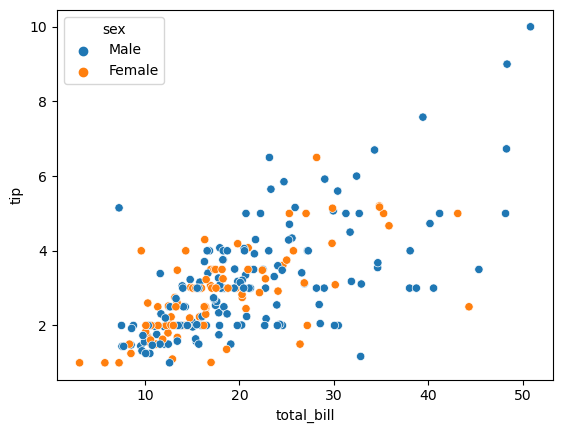

In [7]:
tips = sns.load_dataset("tips")

fig, ax = plt.subplots()
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'sex', data = tips)
plt.savefig("output/result.png")
plt.show()

## matplotlib와 seaborn을 동시에 사용한 subplotting 기법
- 다중차트를 하나의 도화지에 담도록 하겠다.

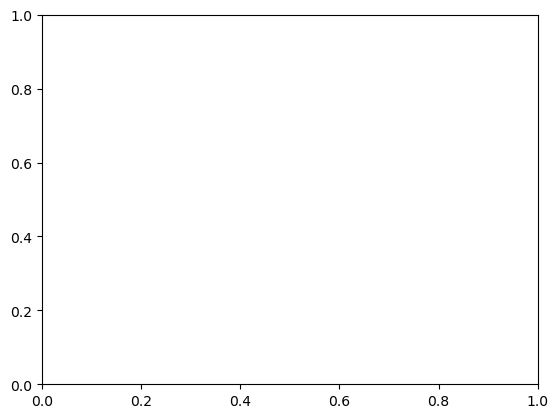

In [8]:
fig, ax = plt.subplots()

plt.show()

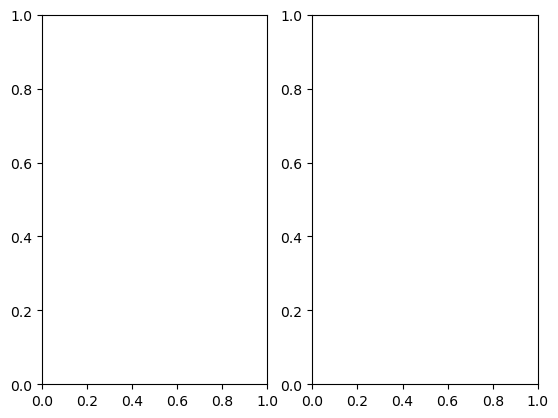

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)

plt.show()

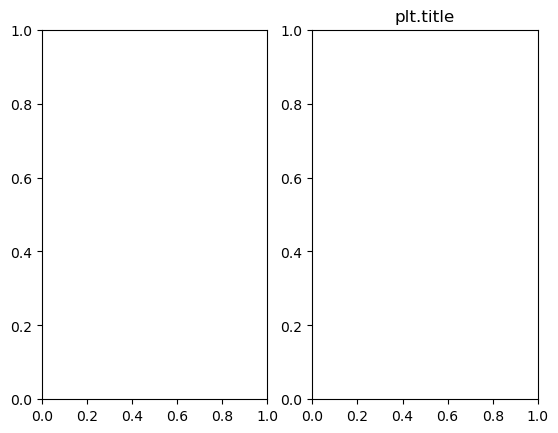

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)

plt.title("plt.title")  # 차트가 2개 있을때는 plt.title을 사용할 수가 없다.
plt.show()

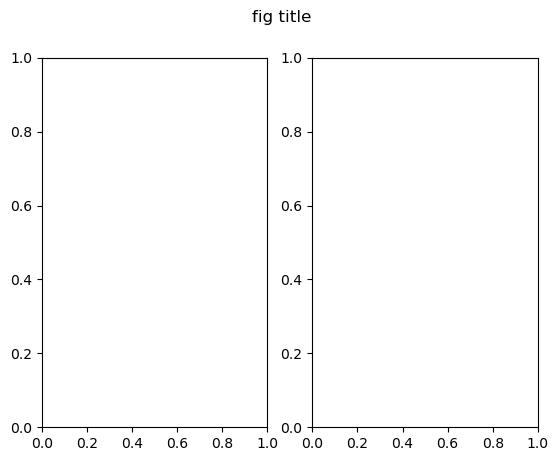

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)

fig.suptitle("fig title")
plt.show()

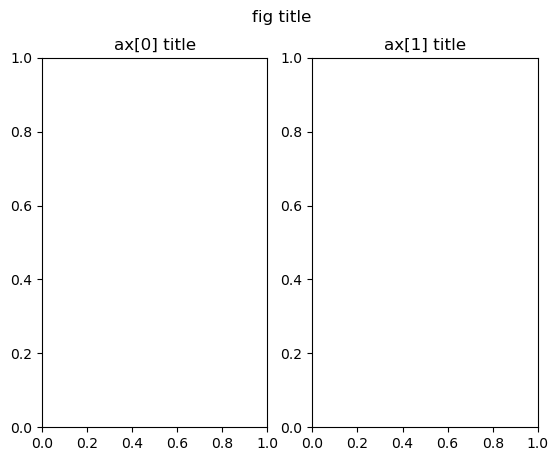

In [12]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)

ax[0].set_title("ax[0] title")
ax[1].set_title("ax[1] title")

fig.suptitle("fig title")
plt.show()

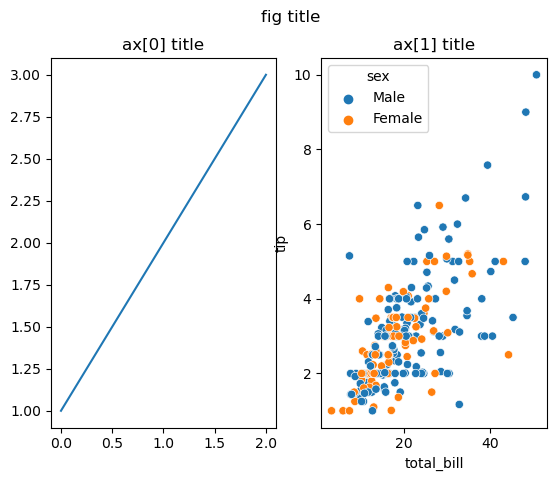

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)

ax[0].set_title("ax[0] title")
ax[0].plot([1, 2, 3])

ax[1].set_title("ax[1] title")
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'sex', data = tips)

fig.suptitle("fig title")
plt.show()

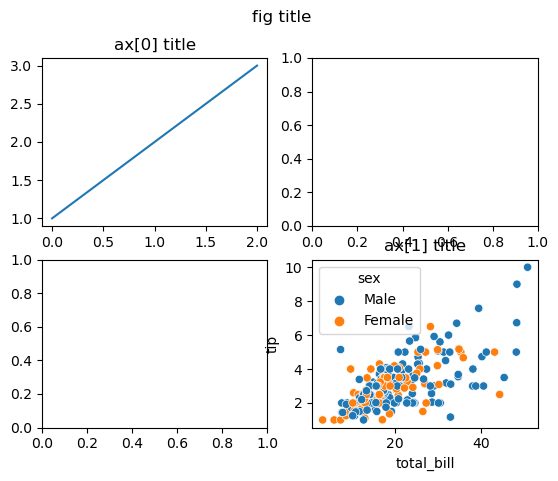

In [19]:
fig, ax = plt.subplots(nrows = 2, ncols = 2)

ax[0, 0].set_title("ax[0] title")
ax[0, 0].plot([1, 2, 3])

ax[1, 1].set_title("ax[1] title")
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'sex', data = tips)

fig.suptitle("fig title")
plt.show()

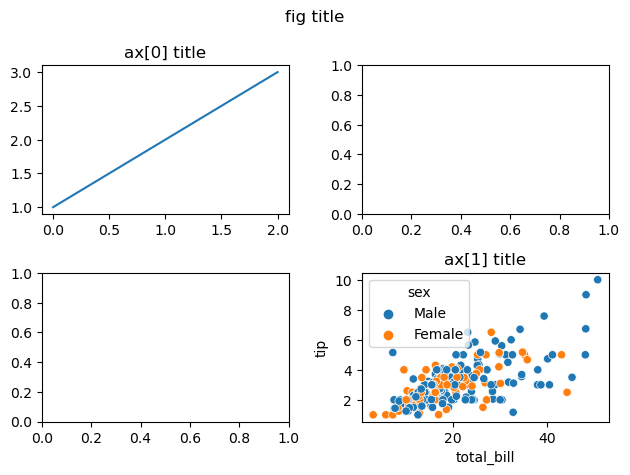

In [20]:
fig, ax = plt.subplots(nrows = 2, ncols = 2)

ax[0, 0].set_title("ax[0] title")
ax[0, 0].plot([1, 2, 3])

ax[1, 1].set_title("ax[1] title")
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'sex', data = tips)

fig.suptitle("fig title")
plt.tight_layout()
plt.show()

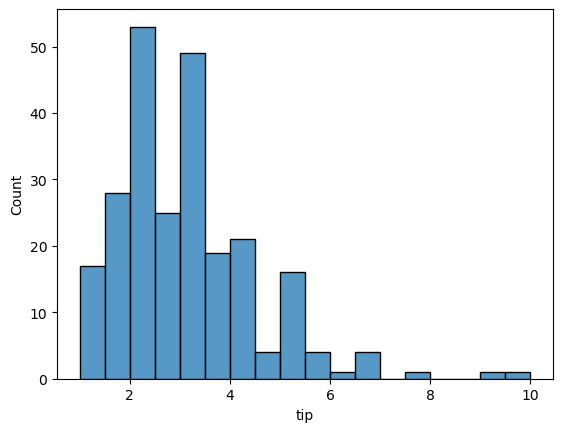

In [21]:
fig, ax = plt.subplots()
sns.histplot(x = 'tip', ax = ax, data = tips)
plt.show()

## 산점도 그래프
- x축과 y축 데이터 형태가 연속형 데이터가 와야 함
- 연속형 데이터의 예시: 키, 몸무게 등 소수점이 존재하는 데이터

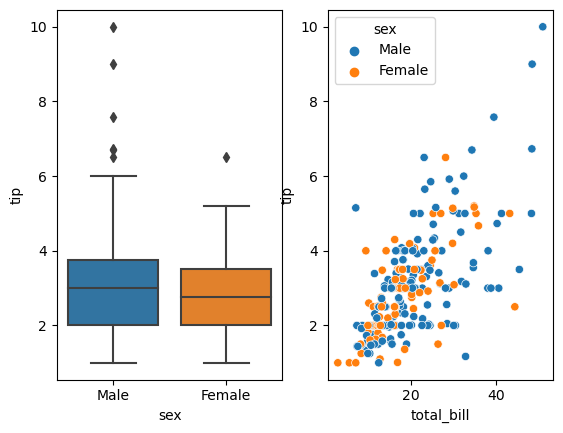

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2)
sns.boxplot(x='sex', y='tip', data=tips, ax=ax[0])
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips, ax=ax[1])
plt.show()

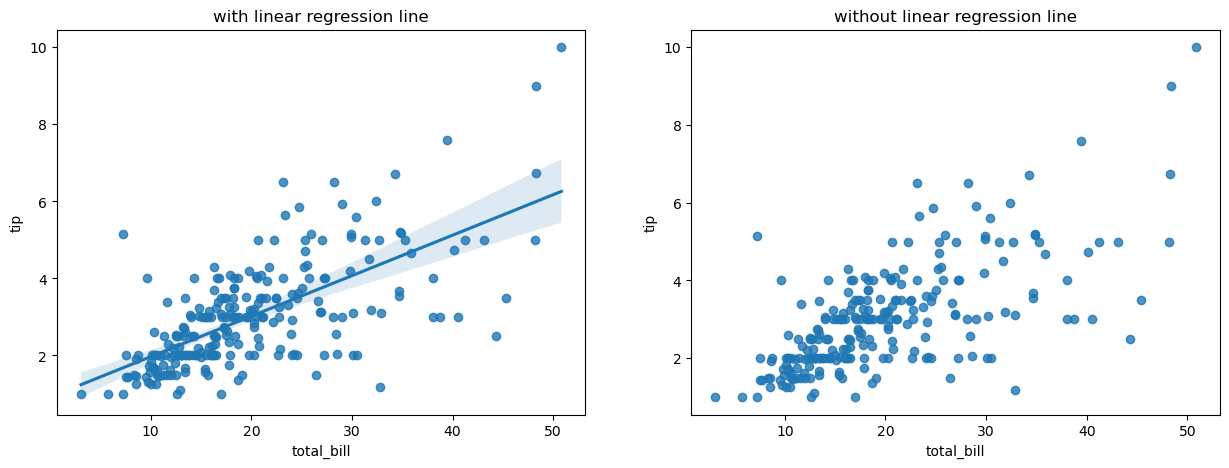

In [27]:
fig, ax=plt.subplots(1, 2, figsize=(15, 5))

sns.regplot(x="total_bill", y="tip", data=tips, ax=ax[0], fit_reg=True)
ax[0].set_title('with linear regression line')

sns.regplot(x="total_bill", y="tip", data=tips, ax=ax[1], fit_reg=False)
ax[1].set_title('without linear regression line')

plt.show()

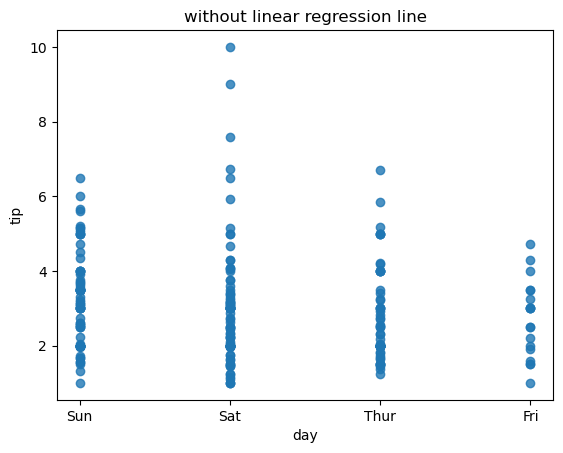

In [28]:
fig, ax = plt.subplots()

sns.regplot(x="day", y="tip", data=tips, ax=ax, fit_reg=False)
ax.set_title('without linear regression line')

plt.show()

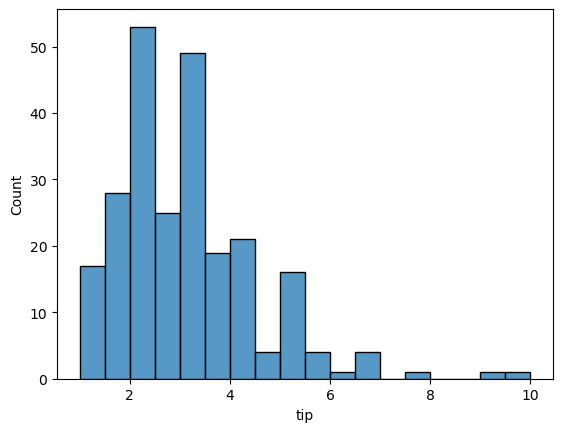

In [29]:
fig, ax = plt.subplots()
# sns.displot(x = 'tip', ax = ax, data = tips) # 경고메시지만 확인, ax 미 존재
sns.histplot(x = 'tip', ax = ax, data = tips)
plt.show()

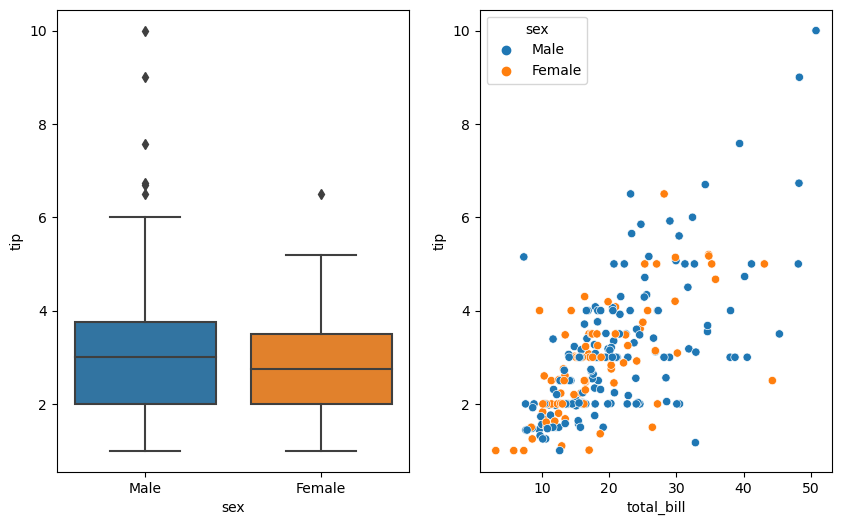

In [30]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 6))

sns.boxplot(x = 'sex', y = 'tip', ax = ax[0], data = tips)
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'sex', ax = ax[1], data = tips)
plt.show()

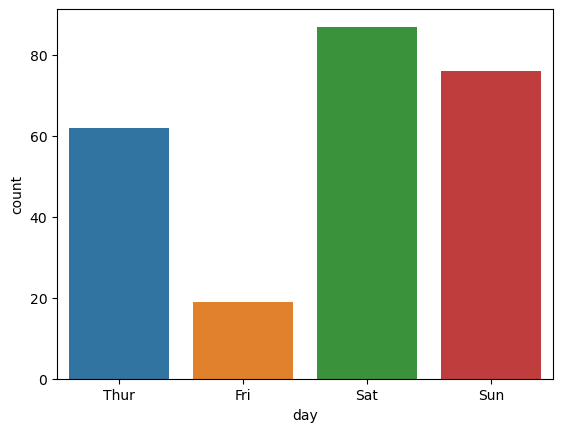

In [31]:
sns.countplot(x = 'day', data = tips)
plt.show()

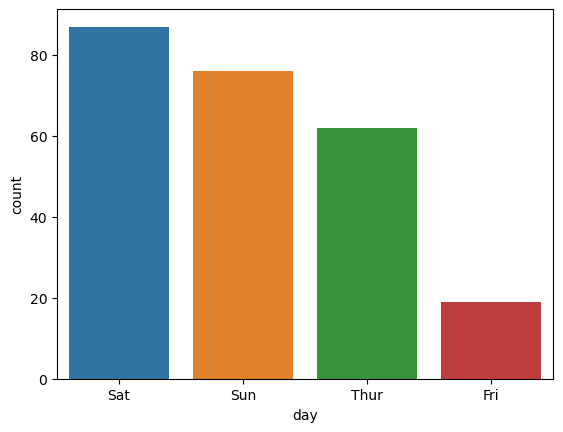

In [32]:
sns.countplot(x = 'day', data = tips, order = tips['day'].value_counts().index)
plt.show()

## 시각화 중급 레벨
### 라이브러리 가져오기

In [33]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter) # 축 설정할 때 값
import seaborn as sns
import numpy as np

### 데이터 불러오기

In [34]:
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [35]:
# y축 설정할 때, 값을 소수점 2자리까지 표현
def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

<class 'matplotlib.patches.Rectangle'>
17.68
<class 'matplotlib.patches.Rectangle'>
17.15
<class 'matplotlib.patches.Rectangle'>
20.44
<class 'matplotlib.patches.Rectangle'>
21.41
Text(0, 0, 'Thur')
Text(1, 0, 'Fri')
Text(2, 0, 'Sat')
Text(3, 0, 'Sun')


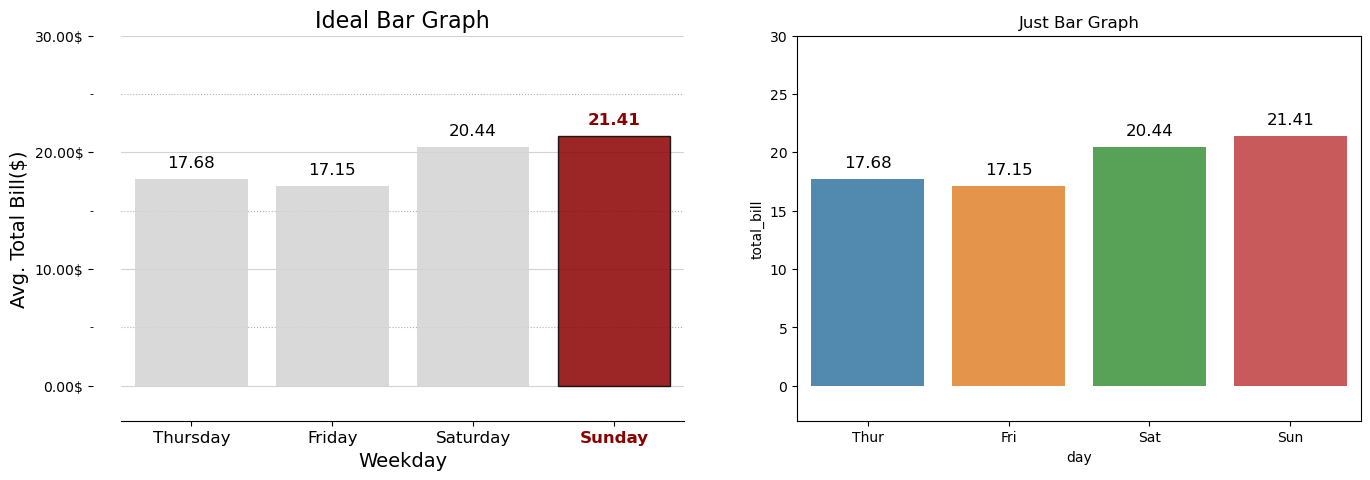

In [36]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

# 이상적인 막대 그래프
ax0 = sns.barplot(x = "day", y = 'total_bill', data = tips,
                  errorbar=None, color='lightgray', zorder=2, alpha=0.85, ax=ax[0]) # zorder=2, 

group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
# print(group_mean)
h_day = group_mean.sort_values(ascending=False).index[0] # 해당되는 결괏값의 MAX값의 인덱스 요일을 하나 가져옴
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2) # 해당되는 결괏값의 MAX값을 하나 가져옴

for p in ax0.patches:
  print(type(p))
  fontweight = "normal"
  color = "k"
  height = np.round(p.get_height(), 2)
  print(height)
  if h_mean == height:
    fontweight="bold"
    color="darkred" # Adobe Color Wheel 색상코드 추가
    p.set_facecolor(color)
    p.set_edgecolor("black")
  ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center',
           size=12,
           fontweight=fontweight, color=color)

# y축 범위 지정 옵션
ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size = 16)

# 가로세로 축, 일부 수정 및 변경
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

# y축 값 변경
ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

# y축 라벨 변경
ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

# y축 Grid 라인 수정 
ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

# x축의 값을 변경
ax0.set_xlabel("Weekday", fontsize=14)
for xtick in ax0.get_xticklabels():
  print(xtick)
  if xtick.get_text() == h_day:
    xtick.set_color("darkred")
    xtick.set_fontweight("demibold")
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)

# 그냥 일반 막대 그래프
ax1 = sns.barplot(x = "day", y = 'total_bill', data = tips, errorbar=None, alpha=0.85, ax=ax[1])
for p in ax1.patches:
  height = np.round(p.get_height(), 2)
  ax1.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12)
ax1.set_ylim(-3, 30)
ax1.set_title("Just Bar Graph")


plt.show()

Text(0, 0, 'Thur')
Text(1, 0, 'Fri')
Text(2, 0, 'Sat')
Text(3, 0, 'Sun')


C:\Users\1qlqj\AppData\Local\Temp\ipykernel_5484\3198861828.py:71: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


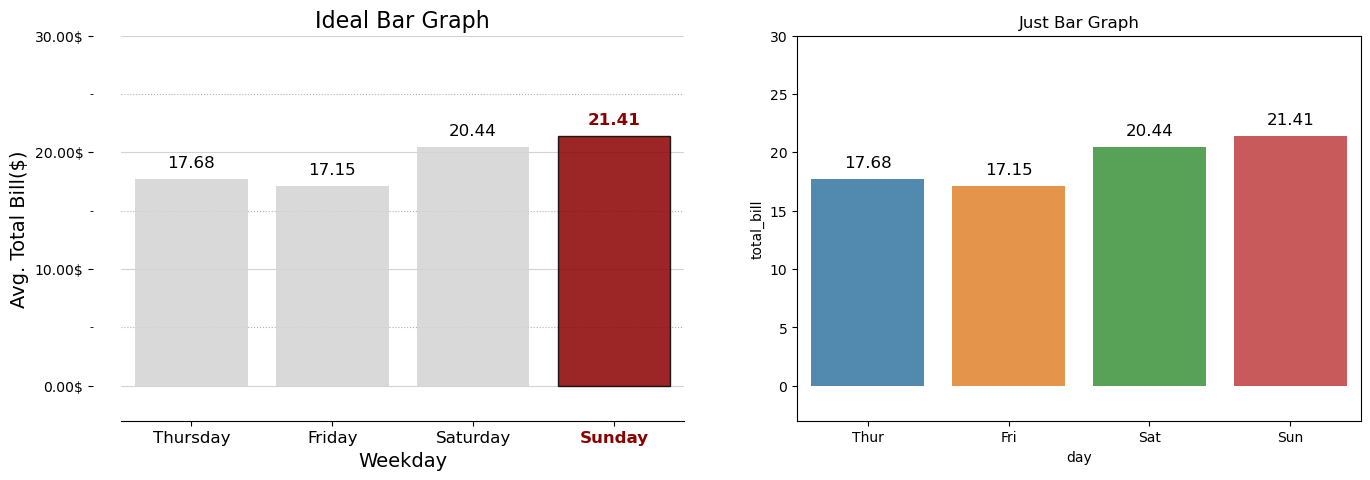

In [37]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

# 데이터 불러오기
tips = sns.load_dataset("tips")

# 시각화 객체지향선언
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

# Ideal Bar Graph
ax0 = sns.barplot(x = "day", y = 'total_bill', data = tips,
                  errorbar=None, color='lightgray', alpha=0.85, zorder=2,
                  ax=ax[0])

group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2)
for p in ax0.patches:
  fontweight = "normal"
  color = "k"
  height = np.round(p.get_height(), 2)
  if h_mean == height:
    fontweight="bold"
    color="darkred"
    p.set_facecolor(color)
    p.set_edgecolor("black")
  ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center',
           size=12,
           fontweight=fontweight, color=color)

ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size = 16)

ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

ax0.set_xlabel("Weekday", fontsize=14)
for xtick in ax0.get_xticklabels():
  print(xtick)
  if xtick.get_text() == h_day:
    xtick.set_color("darkred")
    xtick.set_fontweight("demibold")
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)

ax1 = sns.barplot(x = "day", y = 'total_bill', data = tips,
                  errorbar=None, alpha=0.85,
                  ax=ax[1])
for p in ax1.patches:
  height = np.round(p.get_height(), 2)
  ax1.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12)
ax1.set_ylim(-3, 30)
ax1.set_title("Just Bar Graph")

fig.show()